# Project Proposal

In [1]:
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

**Introduction:** 
- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question

Tennis is a popular sport among men and women all over the world. In professional tennis, players compete in various tournaments, accumulate ranking points, and move up or down in the rankings based on their performance. This system is used to determine tournament entries and player recognition.

To answer the question of: "How does a player's current rank affect their overall prize money?" we will be using the data `player_stats(1).csv`. This data set contains the statistics of the top 500 tennis players in the world.

In [2]:
# run to read data 
player_data <- read_csv("https://raw.githubusercontent.com/dcai01/dsci100_project/main/project_proposal/data/player_stats%20(1).csv")

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
#Tidying data
player_data$"Prize Money" <- gsub("[^0-9.-]", "", player_data$"Prize Money")
player_data_renamed <- player_data |>
    separate(Age, into = c("age", "birthday"), sep ="\\(") |>
    separate("Best Rank", into = c("best_rank", "date"), sep ="\\(") |>
    separate("Current Rank", into = c("current_rank", "points"), sep ="\\(") |>
    rename(plays = Plays, backhand = Backhand, name = Name, prize_money = "Prize Money")|>
    select(name, age, plays, current_rank, best_rank, backhand, prize_money) 

player_data_renamed$age <- as.numeric(player_data_renamed$age)
player_data_renamed$current_rank <- as.numeric(player_data_renamed$current_rank)
player_data_renamed$best_rank <- as.numeric(player_data_renamed$best_rank)
player_data_renamed$prize_money <- as.numeric(player_data_renamed$prize_money)

player_data_renamed$plays_dummy <- ifelse(player_data_renamed$plays == "Right-handed", 1, 0) #1 means "Right-handed" and 0 means "Left-handed	
player_data_renamed$backhand_dummy <- ifelse(player_data_renamed$backhand == "One-handed", 1, 0) #1 means "One-handed	" and 0 means "Two-handed"


player_data_renamed

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


name,age,plays,current_rank,best_rank,backhand,prize_money,plays_dummy,backhand_dummy
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Oscar Jose Gutierrez,26,Right-handed,378,363,NA,NA,1,NA
Jack Draper,18,Left-handed,326,316,Two-handed,59040,0,0
Lukas Lacko,32,Right-handed,178,44,Two-handed,3261567,1,0
Duck Hee Lee,21,Right-handed,236,130,Two-handed,374093,1,0
Bernard Tomic,27,Right-handed,183,17,Two-handed,6091971,1,0
Hubert Hurkacz,22,Right-handed,31,31,Two-handed,1517157,1,0
Sekou Bangoura,28,Right-handed,307,213,Two-handed,278709,1,0
Tung Lin Wu,21,Right-handed,232,229,Two-handed,59123,1,0
Sanjar Fayziev,25,Right-handed,417,253,Two-handed,122734,1,0


**Preliminary exploratory data analysis:**
- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [4]:
player_split <- initial_split(player_data_renamed, prop = 0.75, strata = prize_money)
player_train <- training(player_split)
player_test <- testing(player_split)

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 12
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message:
“Removed 134 rows containing missing values (`geom_point()`).”


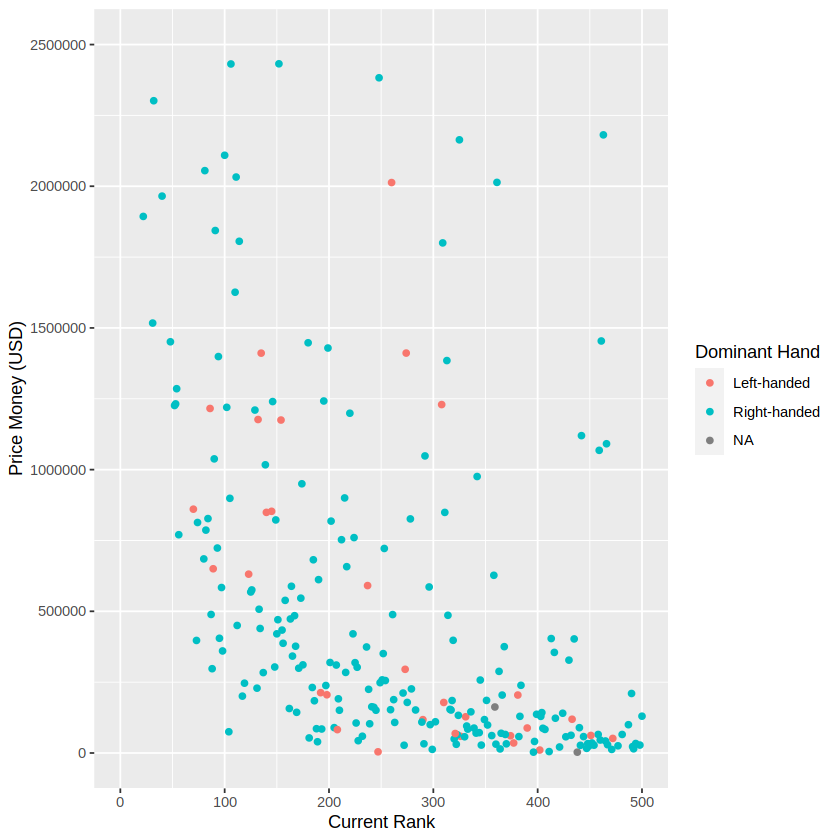

In [5]:
small_plot <- ggplot(player_train, aes(x = current_rank, y = prize_money, color = plays)) +
  geom_point() +
  xlab("Current Rank") +
  xlim(0, 500) +
  ylim(0, 2500000) +
  ylab("Price Money (USD)") +
  labs(color = "Dominant Hand")
  theme(text = element_text(size = 12))

small_plot

**Methods:**
- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
- Describe at least one way that you will visualize the results

We will use regression to predict the Prize Money for tennis athlete by using variable of Age and Current Rank. 
These two are both useful variable because they both influence the Prize Money. For Current Rank variable, 
it is a strong indicator of a tennis player's recent performance. Higher-ranked players typically earn more money 
as they tend to advance further in tournaments and receive larger prize money. For age variable, typically as 
athletes age, their price money decreases to a certain extent. In predictive modeling, it's essential to consider
both variables as they provide different dimensions of a player's career and can help create a more accurate model. 

**Expected outcomes and significance:**
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?

We expect to find that the higher best ranking will lead to a higher prize money. Since the ranking determines the level of tournament that a tennis player competes in, we can assume that the higher the tournament means the higher the rank and therefore, more prize money. We can use these findings to predict how much money a tennis player makes in prize money. If a new tennis player were to just start out their career, according to how their ranking is progressing we can see how much money this player is expected to make in the future. **last question hasnt been answered**

hello there